In [150]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # data visualization library based on matplotlib
import numpy as np
# Scipy:
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [151]:
data =pd.read_csv("auto-mpg.csv")

In [152]:
data.shape

(398, 9)

In [153]:
data.isnull().values.any()

False

In [154]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [155]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [156]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [157]:
data.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [158]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

### Notice that 'horsepower' is not a numeric datatype and hence cannot be used for statistical manipulation

TypeError: unsupported operand type(s) for /: 'str' and 'int'

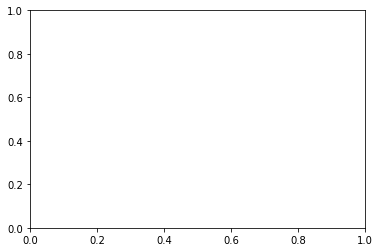

In [159]:
sns.distplot(data["horsepower"])

### We convert it to numeric data as follows, check for NULL/NaN values and drop the corresponding rows

In [160]:
data['horsepower'] = pd.to_numeric(data['horsepower'],errors='coerce')
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [161]:
data.isnull().values.any()

True

In [162]:
data=data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False);
data.isnull().values.any()

False

In [163]:
data.shape

(392, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09ce1964a8>,
      dtype=object)

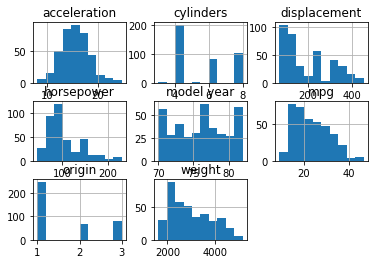

In [164]:
data.hist()

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [317]:
X = data.drop(["mpg","car name","origin","cylinders"],axis=1)
X.head()

,displacement,horsepower,weight,acceleration,model year
0,307.0,130.0,3504,12.0,70
1,350.0,165.0,3693,11.5,70
2,318.0,150.0,3436,11.0,70
3,304.0,150.0,3433,12.0,70
4,302.0,140.0,3449,10.5,70


In [208]:
y= data["mpg"]
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [318]:
X = StandardScaler().fit_transform(X)
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  , -1.62531533],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362, -1.62531533],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924, -1.62531533],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ,  1.63640964],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813,  1.63640964],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312,  1.63640964]])

In [210]:
y=np.log(y)
y.head()

0    2.890372
1    2.708050
2    2.890372
3    2.772589
4    2.833213
Name: mpg, dtype: float64

In [307]:
y.describe()

count    392.000000
mean       3.098313
std        0.340039
min        2.197225
25%        2.833213
50%        3.124505
75%        3.367296
max        3.841601
Name: mpg, dtype: float64

In [319]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=42)
X_train.shape[0] == y_train.shape[0]

True

## Linear Regression Model
The simplest ML model

In [320]:
from sklearn.metrics import mean_squared_error
model = LinearRegression().fit(X_train, y_train)
y_pred=model.predict(X_test)

mean_squared_error(y_test, y_pred)

0.014098824064442399

In [321]:
model.score(X_test,y_test)

0.8618714977208409

## Support Vector Regression Model

In [322]:
from sklearn.svm import SVR
clf = SVR(gamma='scale', C=0.420, epsilon=0.045,)
clf.fit(X_train, y_train) 
y_pred=clf.predict(X_test)
mean_squared_error(y_test, y_pred)

0.01026669088931636

In [323]:
clf.score(X_test,y_test)

0.8994155378191507

## Gradient Boosting Regression Model

In [324]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=32)
gb_regressor.fit(X_train,y_train)
y_pred=gb_regressor.predict(X_test)

mean_squared_error(y_test, y_pred)

0.013526390301857823

In [325]:
gb_regressor.score(X_test,y_test)

0.8674797256069698

In [326]:
gb_regressor1 = GradientBoostingRegressor(loss='huber',n_estimators=100,max_features="log2",learning_rate=0.1)
gb_regressor1.fit(X_train,y_train)
y_pred=gb_regressor1.predict(X_test)

mean_squared_error(y_test, y_pred)

0.01201745516836492

In [327]:
gb_regressor1.score(X_test,y_test)

0.8822630117216916

## Model Prediction
Next try predicting the fuel efficiency from user input values using a function for each model

In [328]:
def SVR_predict(list_input):
    list_input= [float(i) for i in list_input]
    dataset_display = data.drop(["mpg","car name","origin","cylinders"],axis=1)
    df2=pd.DataFrame([list_input],columns=['displacement', 'horsepower', 'weight',"acceleration","model year"])
    dataset_display=dataset_display.append(df2,ignore_index=True)
    dataset_display = StandardScaler().fit_transform(dataset_display)
    y_pred=clf.predict(dataset_display[[len(dataset_display)-1]])
    
    return "Fuel efficieny value of the vehicle is : {} MPG".format(str(np.round(np.e**y_pred.max(),2)))

In [335]:
input_string = input("Input value of displacement, horsepower, weight, acceleration and model year seperated by space [5 values]: \n ")
list_input  = input_string.split()
SVR_predict(list_input)

Input value of displacement, horsepower, weight, acceleration and model year seperated by space [5 values]: 
 500 88 2515 12 79


'Fuel efficieny value of the vehicle is : 19.69 MPG'

In [331]:
def GB_predict(list_input):
    list_input= [float(i) for i in list_input]
    dataset_display = data.drop(["mpg","car name","origin","cylinders"],axis=1)
    df2=pd.DataFrame([list_input],columns=['displacement', 'horsepower', 'weight',"acceleration","model year"])
    dataset_display=dataset_display.append(df2,ignore_index=True)
    dataset_display = StandardScaler().fit_transform(dataset_display)
    y_pred=gb_regressor1.predict(dataset_display[[len(dataset_display)-1]])
    
    return "Fuel efficieny value of the vehicle is : {} MPG".format(str(np.round(np.e**y_pred.max(),2)))

In [333]:
input_string = input("Input value of displacement, horsepower, weight, acceleration and model year seperated by space [5 values]: \n ")
list_input  = input_string.split()
GB_predict(list_input)

Input value of displacement, horsepower, weight, acceleration and model year seperated by space [5 values]: 
 2300 88 2515 12 79


'Fuel efficieny value of the vehicle is : 23.0 MPG'